In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline

In [2]:
# set random seed to have reproducible results
# sklearn uses numpy random seed
np.random.seed(42)

In [3]:
# Reading the dataset 
df = pd.read_csv('historical_data.csv')
df.head()


,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 16 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   market_id                                     196441 non-null  float64
 1   created_at                                    197428 non-null  object 
 2   actual_delivery_time                          197421 non-null  object 
 3   store_id                                      197428 non-null  int64  
 4   store_primary_category                        192668 non-null  object 
 5   order_protocol                                196433 non-null  float64
 6   total_items                                   197428 non-null  int64  
 7   subtotal                                      197428 non-null  int64  
 8   num_distinct_items                            197428 non-null  int64  
 9   min_item_price                                19

In [5]:
## Panda proffiling of the data set
import pandas_profiling as pp
profile = pp.ProfileReport(df)
profile.to_file("output.html")


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
from datetime import datetime 
df["created_at"] = pd.to_datetime(df['created_at'])
df["actual_delivery_time"] = pd.to_datetime(df['actual_delivery_time'])
df["actual_total_delivery_duration"] = (df["actual_delivery_time"] - df["created_at"]).dt.total_seconds()
df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,actual_total_delivery_duration
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0,3779.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0,4024.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0,1781.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0,3075.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0,2390.0


In [7]:
# Creating a new feature 
df['estimated_non_prep_duration'] = df["estimated_store_to_consumer_driving_duration"]+df["estimated_order_place_duration"]

In [8]:
df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,actual_total_delivery_duration,estimated_non_prep_duration
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0,3779.0,1307.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0,4024.0,1136.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0,1781.0,1136.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0,3075.0,735.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0,2390.0,1096.0


In [9]:
df["busy_dasher_ratio"] = df["total_busy_dashers"]/df["total_onshift_dashers"]

In [10]:
df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,actual_total_delivery_duration,estimated_non_prep_duration,busy_dasher_ratio
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0,3779.0,1307.0,0.424242
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0,4024.0,1136.0,2.000000
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0,1781.0,1136.0,0.000000
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0,3075.0,735.0,1.000000
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0,2390.0,1096.0,1.000000


In [11]:
# Checking the ids and decide whether to encode or not

In [12]:
df["market_id"].nunique()

6

In [13]:
df["store_id"].nunique()

6743

In [14]:
df["order_protocol"].nunique()

7

In [15]:
# Create dictionary with most repeated categories of each store to fill null rows where it is possible

store_id_unique = df["store_id"].unique().tolist()
store_id_and_category = {store_id:df[df.store_id==store_id].store_primary_category.mode()
                        for store_id in store_id_unique }

In [16]:
store_id_unique

[1845,
 5477,
 2841,
 4139,
 5058,
 4149,
 3201,
 5054,
 2004,
 1984,
 4905,
 1698,
 1936,
 6015,
 976,
 5081,
 1019,
 3994,
 6395,
 3879,
 6517,
 6584,
 4003,
 1848,
 3654,
 6241,
 1521,
 5326,
 1203,
 3155,
 2527,
 2183,
 2652,
 3065,
 414,
 3468,
 5674,
 2716,
 4251,
 1148,
 4062,
 280,
 2621,
 2928,
 132,
 2096,
 5579,
 6153,
 2009,
 2769,
 5667,
 4753,
 3821,
 1788,
 5788,
 6115,
 963,
 3427,
 517,
 1807,
 1498,
 5226,
 1904,
 2273,
 4655,
 6922,
 4320,
 6132,
 5171,
 5152,
 4616,
 4215,
 4031,
 3220,
 4476,
 1808,
 1540,
 6313,
 6359,
 3469,
 1867,
 1384,
 562,
 6296,
 5547,
 1275,
 6740,
 429,
 3404,
 6045,
 6872,
 6287,
 5550,
 2751,
 3243,
 283,
 6852,
 2742,
 6025,
 5003,
 4566,
 1269,
 3845,
 4491,
 1027,
 2223,
 2849,
 238,
 265,
 4182,
 4046,
 4534,
 2187,
 3307,
 3639,
 2938,
 2203,
 3997,
 2731,
 4925,
 4346,
 6418,
 6544,
 658,
 4818,
 5589,
 3560,
 6165,
 5711,
 4582,
 368,
 59,
 6516,
 5234,
 1113,
 1451,
 3329,
 2853,
 199,
 3999,
 6575,
 6126,
 2155,
 70,
 2660,
 33

In [17]:
store_id_and_category

{1845: 0    american
 Name: store_primary_category, dtype: object,
 5477: 0     indian
 1    mexican
 Name: store_primary_category, dtype: object,
 2841: 0    italian
 Name: store_primary_category, dtype: object,
 4139: 0    mexican
 Name: store_primary_category, dtype: object,
 5058: 0    italian
 Name: store_primary_category, dtype: object,
 4149: 0    sandwich
 1        thai
 Name: store_primary_category, dtype: object,
 3201: 0    cafe
 Name: store_primary_category, dtype: object,
 5054: 0    italian
 Name: store_primary_category, dtype: object,
 2004: 0    american
 Name: store_primary_category, dtype: object,
 1984: 0    chinese
 Name: store_primary_category, dtype: object,
 4905: 0    mexican
 Name: store_primary_category, dtype: object,
 1698: 0    sandwich
 Name: store_primary_category, dtype: object,
 1936: 0    singaporean
 Name: store_primary_category, dtype: object,
 6015: 0    burger
 Name: store_primary_category, dtype: object,
 976: 0    breakfast
 Name: store_primary_c

In [18]:
def fill(store_id):
    """
    Return primary store category from the dictionary
    """
    try:
        return store_id_and_category[store_id].values[0]
    except:
        return np.nan
# fill the null value
df['nan_free_store_primary_category'] = df.store_id.apply(fill)

In [19]:
df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,actual_total_delivery_duration,estimated_non_prep_duration,busy_dasher_ratio,nan_free_store_primary_category
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0,3779.0,1307.0,0.424242,american
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0,4024.0,1136.0,2.000000,indian
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0,1781.0,1136.0,0.000000,indian
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0,3075.0,735.0,1.000000,indian
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0,2390.0,1096.0,1.000000,indian


In [20]:
## Creating the dummies for the feature

In [21]:
# Creating dummies for the order protocols
order_protocol_dummies = pd.get_dummies(df.order_protocol)
order_protocol_dummies = order_protocol_dummies.add_prefix('order_protocols_')
order_protocol_dummies.head()

,order_protocols_1.0,order_protocols_2.0,order_protocols_3.0,order_protocols_4.0,order_protocols_5.0,order_protocols_6.0,order_protocols_7.0
0,1,0,0,0,0,0,0
1,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0


In [22]:
# Creating dummies for the market_id
market_id_dummies = pd.get_dummies(df.market_id)
market_id_dummies = market_id_dummies.add_prefix('market_id_')
market_id_dummies.head()

,market_id_1.0,market_id_2.0,market_id_3.0,market_id_4.0,market_id_5.0,market_id_6.0
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,1,0,0,0
3,0,0,1,0,0,0
4,0,0,1,0,0,0


In [23]:
# Creating dummies for the store primary category

store_primary_category_dummies = pd.get_dummies(df.nan_free_store_primary_category)
store_primary_category_dummies = store_primary_category_dummies.add_prefix('category')
store_primary_category_dummies.head()

,categoryafghan,categoryafrican,categoryalcohol,categoryalcohol-plus-food,categoryamerican,categoryargentine,categoryasian,categorybarbecue,categorybelgian,categorybrazilian,...,categorysouthern,categoryspanish,categorysteak,categorysushi,categorytapas,categorythai,categoryturkish,categoryvegan,categoryvegetarian,categoryvietnamese
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
# drop created_at, market_id, store_id, store_primary_category, actual_delivery_time, actual_total_delivery_duration
train_df = df.drop(columns = ["created_at", "market_id", "store_id", "store_primary_category", "actual_delivery_time", 
                                        "nan_free_store_primary_category", "order_protocol"])
train_df.head()

,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,actual_total_delivery_duration,estimated_non_prep_duration,busy_dasher_ratio
0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0,3779.0,1307.0,0.424242
1,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0,4024.0,1136.0,2.000000
2,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0,1781.0,1136.0,0.000000
3,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0,3075.0,735.0,1.000000
4,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0,2390.0,1096.0,1.000000


In [25]:
# concat all
train_df = pd.concat([train_df, order_protocol_dummies, market_id_dummies, store_primary_category_dummies], axis=1)
# align dtype over dataset
train_df = train_df.astype("float32")
train_df.head()

,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,...,categorysouthern,categoryspanish,categorysteak,categorysushi,categorytapas,categorythai,categoryturkish,categoryvegan,categoryvegetarian,categoryvietnamese
0,4.0,3441.0,4.0,557.0,1239.0,33.0,14.0,21.0,446.0,861.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1900.0,1.0,1400.0,1400.0,1.0,2.0,2.0,446.0,690.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1900.0,1.0,1900.0,1900.0,1.0,0.0,0.0,446.0,690.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6.0,6900.0,5.0,600.0,1800.0,1.0,1.0,2.0,446.0,289.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.0,3900.0,3.0,1100.0,1600.0,6.0,6.0,9.0,446.0,650.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
train_df.describe()

,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,...,categorysouthern,categoryspanish,categorysteak,categorysushi,categorytapas,categorythai,categoryturkish,categoryvegan,categoryvegetarian,categoryvietnamese
count,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,181166.000000,181166.000000,181166.000000,197428.000000,196902.000000,...,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000
mean,3.196391,2682.242188,2.670791,686.189941,1159.415405,44.808094,41.739746,58.050064,309.313446,545.358765,...,0.000815,0.000187,0.005465,0.011300,0.000740,0.037254,0.001175,0.001433,0.004234,0.030928
std,2.665833,1822.968994,1.629398,522.068542,558.358337,34.524193,32.146065,52.657368,90.211159,219.350143,...,0.028535,0.013687,0.073625,0.105705,0.027175,0.189502,0.034246,0.037816,0.064904,0.173167
min,1.000000,0.000000,1.000000,-86.000000,0.000000,-4.000000,-5.000000,-6.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1400.000000,1.000000,299.000000,800.000000,17.000000,15.000000,17.000000,251.000000,382.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,2200.000000,2.000000,595.000000,1095.000000,37.000000,34.000000,41.000000,251.000000,544.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,3395.000000,3.000000,949.000000,1395.000000,65.000000,62.000000,85.000000,446.000000,702.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,411.000000,27100.000000,20.000000,14700.000000,14700.000000,171.000000,154.000000,285.000000,2715.000000,2088.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [27]:
train_df["busy_dasher_ratio"].describe()

count    1.775900e+05
mean              NaN
std               NaN
min              -inf
25%      8.269231e-01
50%      9.622642e-01
75%      1.000000e+00
max               inf
Name: busy_dasher_ratio, dtype: float64

In [28]:
#check infinity values with using numpy isfinite() function
np.where(np.any(~np.isfinite(train_df),axis=0) == True)

(array([ 5,  6,  7,  9, 10, 11, 12], dtype=int64),)

In [29]:
# replace inf values with nan to drop all nans
train_df.replace([np.inf, -np.inf], np.nan, inplace=True)
# drop all nans
train_df.dropna(inplace=True)
train_df.shape

(177070, 100)

In [30]:
# confirm there is not any remaining nans
train_df.isna().sum().sum()

0

# Remove Redundant and Collinear Features
We have 100 columns in our final dataset, which means there might be redundant features. These features are not useful in a way by repeating another feature or having a zero standard deviation. Therefore, doesn't add any new knowledge to ML models. Another potential problem is collinearity. We will check all of them. We start with the correlation matrix.

<AxesSubplot:>

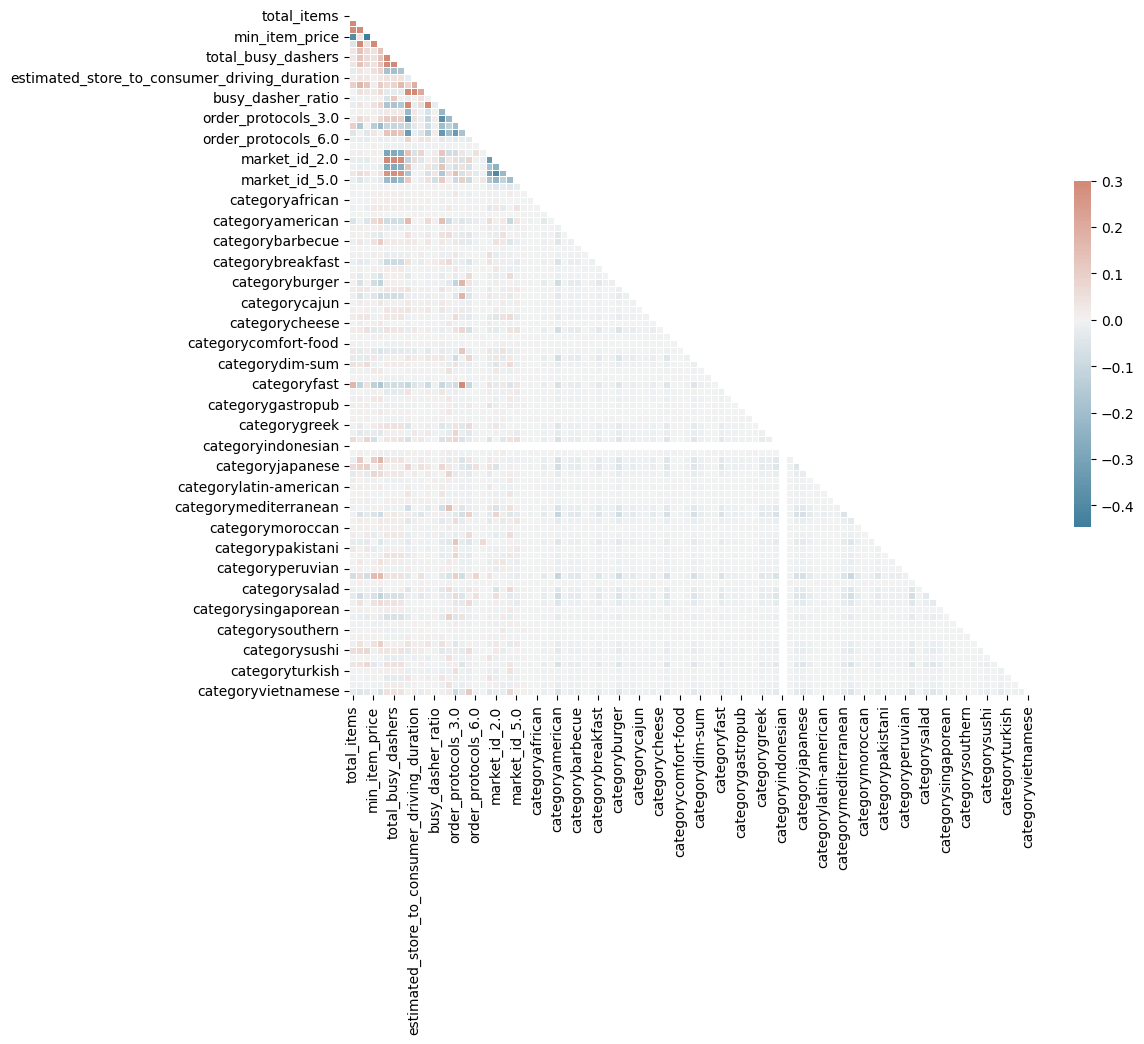

In [31]:
corr = train_df.corr()
mask = np.triu(np.ones_like(corr,dtype=bool))

f,ax = plt.subplots(figsize = (11,9))

# Generate the custom divering colormap
cmap = sns.diverging_palette(230,20,as_cmap = True)

sns.heatmap(corr,mask = mask,cmap = cmap,vmax = .3,center = 0,
           square = True,linewidths=.5,cbar_kws = {"shrink":.5})

In [32]:
# Checking the top correlation feature

In [33]:
def get_reduntant_pairs(df):
    """
    Get diagonal and lower traingular pairs of correlation matrix
    """
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0,df.shape[1]):
        for j in range(0,i+1):
            pairs_to_drop.add((cols[i],cols[j]))
    return pairs_to_drop

In [34]:
def get_top_abs_correlation(df,n=5):
    """
    Sort correlation in the descending order and retueen n highest results
    """
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_reduntant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

In [35]:
print("Top Absolute Correlation ")
print(get_top_abs_correlation(train_df,n=20))

Top Absolute Correlation 
total_onshift_dashers                         total_busy_dashers             0.941741
                                              total_outstanding_orders       0.934639
total_busy_dashers                            total_outstanding_orders       0.931295
estimated_store_to_consumer_driving_duration  estimated_non_prep_duration    0.923086
estimated_order_place_duration                order_protocols_1.0            0.897645
total_items                                   num_distinct_items             0.758146
subtotal                                      num_distinct_items             0.682890
total_items                                   subtotal                       0.557175
min_item_price                                max_item_price                 0.541241
subtotal                                      max_item_price                 0.507947
order_protocols_4.0                           categoryfast                   0.489946
num_distinct_items          

In [36]:
train_df.shape

(177070, 100)

In [37]:
# drop created_at, market_id, store_id, store_primary_category, actual_delivery_time, order_protocol
train_df = df.drop(columns = ["created_at", "market_id", "store_id", "store_primary_category", "actual_delivery_time", 
                                        "nan_free_store_primary_category", "order_protocol"])
# don't concat market id
train_df = pd.concat([train_df, order_protocol_dummies, store_primary_category_dummies], axis=1)
# drop highly correlated features
train_df = train_df.drop(columns=["total_onshift_dashers", "total_busy_dashers",
                                  "categoryindonesian",
                                  "estimated_non_prep_duration"])

train_df = train_df.astype("float32")
train_df.replace([np.inf, -np.inf], np.nan, inplace=True)
train_df.dropna(inplace=True)
train_df.head()

,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,actual_total_delivery_duration,busy_dasher_ratio,...,categorysouthern,categoryspanish,categorysteak,categorysushi,categorytapas,categorythai,categoryturkish,categoryvegan,categoryvegetarian,categoryvietnamese
0,4.0,3441.0,4.0,557.0,1239.0,21.0,446.0,861.0,3779.0,0.424242,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1900.0,1.0,1400.0,1400.0,2.0,446.0,690.0,4024.0,2.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1900.0,1.0,1900.0,1900.0,0.0,446.0,690.0,1781.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6.0,6900.0,5.0,600.0,1800.0,2.0,446.0,289.0,3075.0,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.0,3900.0,3.0,1100.0,1600.0,9.0,446.0,650.0,2390.0,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
train_df.shape

(177070, 90)

In [39]:
print("Top Absolute Correlations")
print(get_top_abs_correlation(train_df, 20))

Top Absolute Correlations
estimated_order_place_duration  order_protocols_1.0    0.897645
total_items                     num_distinct_items     0.758146
subtotal                        num_distinct_items     0.682890
total_items                     subtotal               0.557175
min_item_price                  max_item_price         0.541241
subtotal                        max_item_price         0.507947
order_protocols_4.0             categoryfast           0.489946
num_distinct_items              min_item_price         0.446733
total_items                     min_item_price         0.389277
order_protocols_1.0             order_protocols_3.0    0.373581
estimated_order_place_duration  order_protocols_3.0    0.364170
order_protocols_1.0             order_protocols_5.0    0.342345
estimated_order_place_duration  order_protocols_5.0    0.333291
order_protocols_3.0             order_protocols_5.0    0.332533
order_protocols_1.0             order_protocols_2.0    0.226903
estimated_orde

In [40]:
# drop created_at, market_id, store_id, store_primary_category, actual_delivery_time, order_protocol
train_df = df.drop(columns = ["created_at", "market_id", "store_id", "store_primary_category", "actual_delivery_time", 
                                        "nan_free_store_primary_category", "order_protocol"])
# don't concat order_protocol_dummies
train_df = pd.concat([train_df, store_primary_category_dummies], axis=1)
train_df = train_df.drop(columns=["total_onshift_dashers", "total_busy_dashers",
                                  "categoryindonesian", 
                                  "estimated_non_prep_duration"])

train_df = train_df.astype("float32")
train_df.replace([np.inf, -np.inf], np.nan, inplace=True)
train_df.dropna(inplace=True)
train_df.head()

,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,actual_total_delivery_duration,busy_dasher_ratio,...,categorysouthern,categoryspanish,categorysteak,categorysushi,categorytapas,categorythai,categoryturkish,categoryvegan,categoryvegetarian,categoryvietnamese
0,4.0,3441.0,4.0,557.0,1239.0,21.0,446.0,861.0,3779.0,0.424242,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1900.0,1.0,1400.0,1400.0,2.0,446.0,690.0,4024.0,2.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1900.0,1.0,1900.0,1900.0,0.0,446.0,690.0,1781.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6.0,6900.0,5.0,600.0,1800.0,2.0,446.0,289.0,3075.0,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.0,3900.0,3.0,1100.0,1600.0,9.0,446.0,650.0,2390.0,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
print("Top Absolute Correlations")
print(get_top_abs_correlation(train_df, 20))

Top Absolute Correlations
total_items                                   num_distinct_items                0.758146
subtotal                                      num_distinct_items                0.682890
total_items                                   subtotal                          0.557175
min_item_price                                max_item_price                    0.541241
subtotal                                      max_item_price                    0.507947
num_distinct_items                            min_item_price                    0.446733
total_items                                   min_item_price                    0.389277
estimated_store_to_consumer_driving_duration  actual_total_delivery_duration    0.188418
subtotal                                      actual_total_delivery_duration    0.172312
total_outstanding_orders                      estimated_order_place_duration    0.171049
total_items                                   categoryfast                      0.17

In [42]:
train_df.head()

,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,actual_total_delivery_duration,busy_dasher_ratio,...,categorysouthern,categoryspanish,categorysteak,categorysushi,categorytapas,categorythai,categoryturkish,categoryvegan,categoryvegetarian,categoryvietnamese
0,4.0,3441.0,4.0,557.0,1239.0,21.0,446.0,861.0,3779.0,0.424242,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1900.0,1.0,1400.0,1400.0,2.0,446.0,690.0,4024.0,2.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1900.0,1.0,1900.0,1900.0,0.0,446.0,690.0,1781.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6.0,6900.0,5.0,600.0,1800.0,2.0,446.0,289.0,3075.0,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.0,3900.0,3.0,1100.0,1600.0,9.0,446.0,650.0,2390.0,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
# Some new feature
train_df["Present_distinct_item_of_total"] = train_df["num_distinct_items"]/train_df["total_items"]
train_df["avg_price_per_item"] = train_df["subtotal"]/train_df["total_items"]

In [44]:
train_df.drop(columns=["num_distinct_items","subtotal"],inplace = True)
print("Top absolute Correlation")
print(get_top_abs_correlation(train_df,n=20))

Top absolute Correlation
min_item_price                                avg_price_per_item                0.860580
max_item_price                                avg_price_per_item                0.770382
min_item_price                                max_item_price                    0.541241
total_items                                   Present_distinct_item_of_total    0.445751
                                              min_item_price                    0.389277
                                              avg_price_per_item                0.310759
Present_distinct_item_of_total                avg_price_per_item                0.226711
categorypizza                                 avg_price_per_item                0.225510
estimated_store_to_consumer_driving_duration  actual_total_delivery_duration    0.188418
max_item_price                                Present_distinct_item_of_total    0.178021
categoryfast                                  avg_price_per_item                0.175

In [45]:
train_df.head()

,total_items,min_item_price,max_item_price,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,actual_total_delivery_duration,busy_dasher_ratio,categoryafghan,categoryafrican,...,categorysteak,categorysushi,categorytapas,categorythai,categoryturkish,categoryvegan,categoryvegetarian,categoryvietnamese,Present_distinct_item_of_total,avg_price_per_item
0,4.0,557.0,1239.0,21.0,446.0,861.0,3779.0,0.424242,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,860.25
1,1.0,1400.0,1400.0,2.0,446.0,690.0,4024.0,2.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1900.00
2,1.0,1900.0,1900.0,0.0,446.0,690.0,1781.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1900.00
3,6.0,600.0,1800.0,2.0,446.0,289.0,3075.0,1.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.833333,1150.00
4,3.0,1100.0,1600.0,9.0,446.0,650.0,2390.0,1.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1300.00


In [46]:
train_df.shape

(177070, 83)

# Multicollinearity Check

In [47]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [48]:
def compute_vif(features):
    """
    Computing VIF score using the variance_inflaction_factor() function
    """
    vif_data = pd.DataFrame()
    vif_data["features"] = features
    vif_data["VIF"] = [variance_inflation_factor(train_df[features].values,i)for i in range(len(features))]
    return vif_data.sort_values(by=["VIF"]).reset_index(drop = True)    

In [49]:
# apply VIF computation to all columns
features = train_df.drop(columns=["actual_total_delivery_duration"]).columns.to_list()
vif_data = compute_vif(features)
vif_data

,features,VIF
0,categoryalcohol-plus-food,1.000383
1,categorychocolate,1.000525
2,categorybelgian,1.000760
3,categoryrussian,1.003263
4,categoryafrican,1.003851
...,...,...
77,min_item_price,13.085310
78,estimated_order_place_duration,13.515077
79,max_item_price,17.560312
80,Present_distinct_item_of_total,30.359047


In [50]:
# drop with highest vif score until all vif scores are under 20
multicollinearity = True

while multicollinearity:
    highest_vif_feature = vif_data['features'].values.tolist()[-1]
    print("I will remove", highest_vif_feature)
    features.remove(highest_vif_feature)
    vif_data = compute_vif(features)
    multicollinearity = False if len(vif_data[vif_data.VIF > 20]) == 0 else True

selected_features = vif_data['features'].values.tolist()
vif_data

I will remove avg_price_per_item
I will remove Present_distinct_item_of_total


,features,VIF
0,categoryalcohol-plus-food,1.000232
1,categorychocolate,1.000392
2,categorybelgian,1.000455
3,categoryrussian,1.002034
4,categorygluten-free,1.002329
...,...,...
75,min_item_price,4.804184
76,busy_dasher_ratio,6.358142
77,estimated_store_to_consumer_driving_duration,7.190592
78,max_item_price,9.110421


It was enough to just drop percent_distinct_item_of_total. If you want to observe the effect of multicollinearity you can continue without dropping it and compare the results with dropped version.

# Feature Seleaction

In [52]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# selected features are selected in multicollinearity check part
X = train_df[selected_features]
y = train_df["actual_total_delivery_duration"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

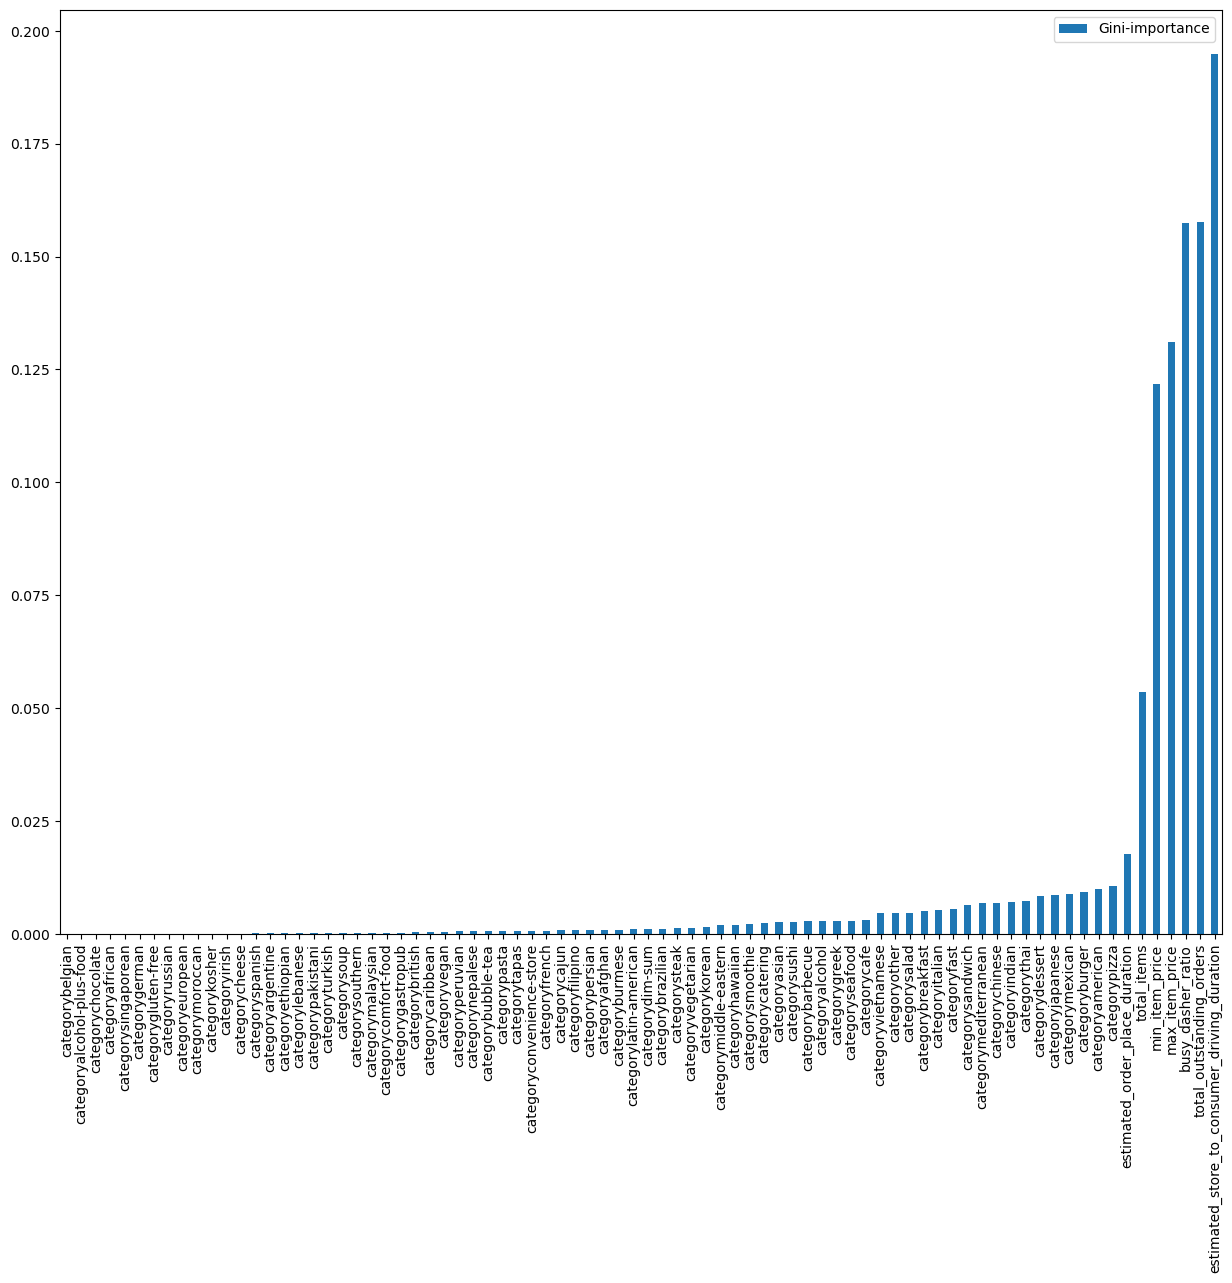

In [53]:
feature_names = [f"features {i}" for i in range((X.shape[1]))]
forest = RandomForestRegressor(random_state=42)
forest.fit(X_train, y_train)
feats = {} # a dict to hold feature_name: feature_importance
for features, importance in zip(X.columns, forest.feature_importances_):
    feats[features] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance').plot(kind='bar', rot=90, figsize=(15,12))
plt.show()

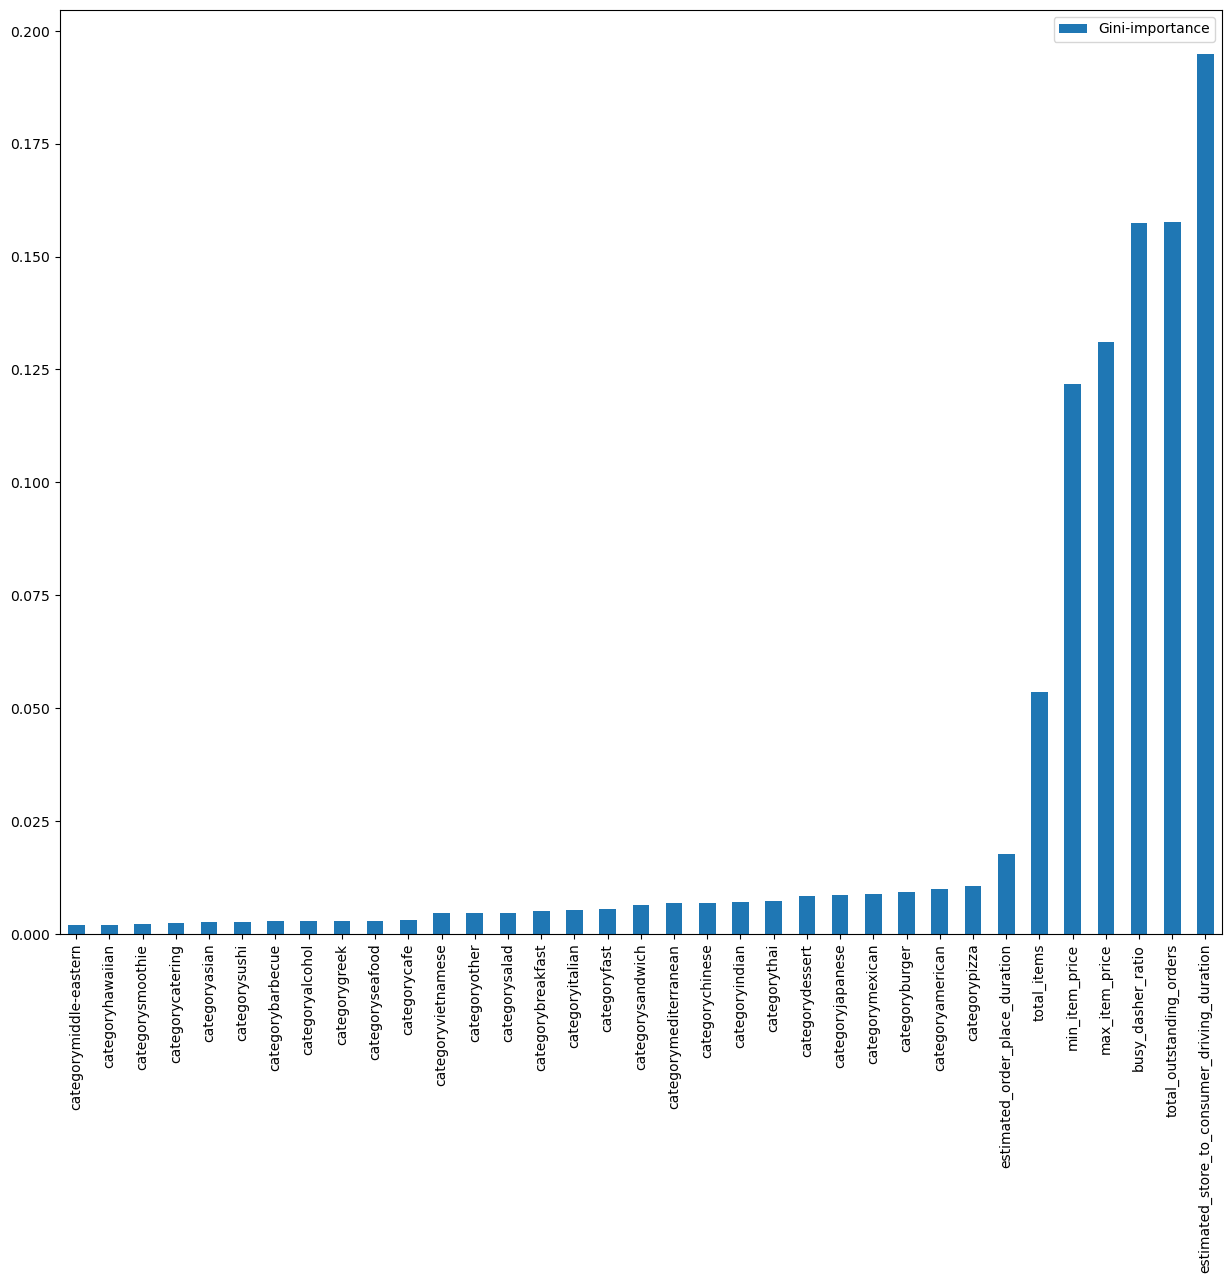

In [54]:
# check the most important ones
importances.sort_values(by='Gini-importance')[-35:].plot(kind='bar', rot=90, figsize=(15,12))
plt.show()

In [55]:
# we can obtain the column names as next
importances.sort_values(by='Gini-importance')[-35:].index.tolist()

['categorymiddle-eastern',
 'categoryhawaiian',
 'categorysmoothie',
 'categorycatering',
 'categoryasian',
 'categorysushi',
 'categorybarbecue',
 'categoryalcohol',
 'categorygreek',
 'categoryseafood',
 'categorycafe',
 'categoryvietnamese',
 'categoryother',
 'categorysalad',
 'categorybreakfast',
 'categoryitalian',
 'categoryfast',
 'categorysandwich',
 'categorymediterranean',
 'categorychinese',
 'categoryindian',
 'categorythai',
 'categorydessert',
 'categoryjapanese',
 'categorymexican',
 'categoryburger',
 'categoryamerican',
 'categorypizza',
 'estimated_order_place_duration',
 'total_items',
 'min_item_price',
 'max_item_price',
 'busy_dasher_ratio',
 'total_outstanding_orders',
 'estimated_store_to_consumer_driving_duration']

In [56]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

def scale(scaler, X, y):
    """Apply the selected scaler to features and target variables"""
    X_scaler = scaler
    X_scaler.fit(X=X, y=y)
    X_scaled = X_scaler.transform(X)
    y_scaler = scaler
    y_scaler.fit(y.values.reshape(-1, 1))
    y_scaled = y_scaler.transform(y.values.reshape(-1, 1))
    
    return X_scaled, y_scaled, X_scaler, y_scaler

In [57]:
# example to show how to use it
X_scaled, y_scaled, X_scaler, y_scaler = scale(MinMaxScaler(), X, y)

In [58]:
# train-test split after scaling
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(
        X_scaled, y_scaled, test_size=0.2, random_state=42)

In [59]:
from sklearn.metrics import mean_squared_error

def rmse_with_inv_transform(scaler, y_test, y_pred_scaled, model_name):
    """Convert the scaled error to actual error"""
    y_predict = scaler.inverse_transform(y_pred_scaled.reshape(-1, 1))
    # return RMSE with squared False     
    rmse_error = mean_squared_error(y_test, y_predict[:,0], squared=False)
    print("Error = "'{}'.format(rmse_error)+" in " + model_name)
    
    return rmse_error, y_predict

In [60]:
# create a generic function which can work with multiple machine learning models
def make_regression(X_train, y_train, X_test, y_test, model, model_name, verbose=True):
    """Apply selected regression model to data and measure error"""
    model.fit(X_train,y_train)
    y_predict=model.predict(X_train)
    train_error = mean_squared_error(y_train, y_predict, squared=False)
    y_predict=model.predict(X_test)
    test_error = mean_squared_error(y_test, y_predict, squared=False)
    if verbose:
        print("Train error = "'{}'.format(train_error)+" in " + model_name)
        print("Test error = "'{}'.format(test_error)+" in " + model_name)
    trained_model = model
    
    return trained_model, y_predict, train_error, test_error

In [61]:
from xgboost import XGBRegressor
from sklearn import tree
from sklearn import svm
from sklearn import neighbors
from sklearn import linear_model

pred_dict = {
    "regression_model": [],
    "feature_set": [],
    "scaler_name": [],
    "RMSE": [],
}


regression_models = {
    "Ridge" : linear_model.Ridge(),
    "DecisionTree" : tree.DecisionTreeRegressor(max_depth=6),
    "RandomForest" : RandomForestRegressor(),
    "XGBoost": XGBRegressor(),

}

feature_sets = {
    "full dataset": X.columns.to_list(),
    "selected_features_40": importances.sort_values(by='Gini-importance')[-40:].index.tolist(),
    "selected_features_20": importances.sort_values(by='Gini-importance')[-20:].index.tolist(),
    "selected_features_10": importances.sort_values(by='Gini-importance')[-10:].index.tolist(), 

    
}

scalers = {
    "Standard scaler": StandardScaler(),
    "MinMax scaler": MinMaxScaler(),
    "NotScale": None,
}

# examine the error for each combination
for feature_set_name in feature_sets.keys():
    feature_set = feature_sets[feature_set_name]
    for scaler_name in scalers.keys():
        print(f"-----scaled with {scaler_name}-------- included columns are {feature_set_name}")
        print("")
        for model_name in regression_models.keys():   
            if scaler_name == "NotScale":
                X = train_df[feature_set]
                y = train_df["actual_total_delivery_duration"]
                X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
                make_regression(X_train, y_train, X_test, y_test, regression_models[model_name], model_name, verbose=True)
            
            else:
                
                X_scaled, y_scaled, X_scaler, y_scaler = scale(scalers[scaler_name], X[feature_set], y)
                X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(
                    X_scaled, y_scaled, test_size=0.2, random_state=42)
                _, y_predict_scaled, _, _ = make_regression(X_train_scaled, y_train_scaled[:,0], X_test_scaled, y_test_scaled[:,0], regression_models[model_name], model_name, verbose=False)
                rmse_error, y_predict = rmse_with_inv_transform(y_scaler, y_test, y_predict_scaled, model_name)

            pred_dict["regression_model"].append(model_name)
            pred_dict["feature_set"].append(feature_set_name)
            pred_dict["scaler_name"].append(scaler_name)
            pred_dict["RMSE"].append(rmse_error)

-----scaled with Standard scaler-------- included columns are full dataset

Error = 2054.022216796875 in Ridge
Error = 2059.2187836271764 in DecisionTree
Error = 2051.3679601906256 in RandomForest
Error = 2037.24951171875 in XGBoost
-----scaled with MinMax scaler-------- included columns are full dataset

Error = 2054.266845703125 in Ridge
Error = 2059.2187833650682 in DecisionTree
Error = 2050.1660160421156 in RandomForest
Error = 2035.524169921875 in XGBoost
-----scaled with NotScale-------- included columns are full dataset



C:\Users\aswin\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.60518e-11): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Train error = 1072.1644287109375 in Ridge
Test error = 2054.0166015625 in Ridge
Train error = 1066.703831714836 in DecisionTree
Test error = 2059.2187831242136 in DecisionTree
Train error = 401.09706524567406 in RandomForest
Test error = 2050.963735093916 in RandomForest
Train error = 969.9609375 in XGBoost
Test error = 2036.8316650390625 in XGBoost
-----scaled with Standard scaler-------- included columns are selected_features_40

Error = 2054.32275390625 in Ridge
Error = 2059.2187836271764 in DecisionTree
Error = 2050.9769549422467 in RandomForest
Error = 2036.6280517578125 in XGBoost
-----scaled with MinMax scaler-------- included columns are selected_features_40

Error = 2054.576171875 in Ridge
Error = 2059.2187833650682 in DecisionTree
Error = 2050.6551002906663 in RandomForest
Error = 2035.4619140625 in XGBoost
-----scaled with NotScale-------- included columns are selected_features_40



C:\Users\aswin\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.50715e-09): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Train error = 1073.013671875 in Ridge
Test error = 2054.322998046875 in Ridge
Train error = 1066.703831714836 in DecisionTree
Test error = 2059.2187831242136 in DecisionTree
Train error = 401.70490323897025 in RandomForest
Test error = 2052.0871837183367 in RandomForest
Train error = 963.6442260742188 in XGBoost
Test error = 2037.2647705078125 in XGBoost
-----scaled with Standard scaler-------- included columns are selected_features_20

Error = 2055.715576171875 in Ridge
Error = 2054.1489122977405 in DecisionTree
Error = 2050.3905364707343 in RandomForest
Error = 2036.521728515625 in XGBoost
-----scaled with MinMax scaler-------- included columns are selected_features_20

Error = 2055.9814453125 in Ridge
Error = 2054.1489124078053 in DecisionTree
Error = 2050.0956536643744 in RandomForest
Error = 2037.02001953125 in XGBoost
-----scaled with NotScale-------- included columns are selected_features_20

Train error = 1075.2000732421875 in Ridge
Test error = 2055.715576171875 in Ridge


C:\Users\aswin\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.61416e-08): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Train error = 1068.8136096600101 in DecisionTree
Test error = 2054.1489122820053 in DecisionTree
Train error = 401.95906980204666 in RandomForest
Test error = 2050.2478402122465 in RandomForest
Train error = 963.9391479492188 in XGBoost
Test error = 2038.542236328125 in XGBoost
-----scaled with Standard scaler-------- included columns are selected_features_10

Error = 2056.88525390625 in Ridge
Error = 2054.2663580326503 in DecisionTree
Error = 2055.0509481843887 in RandomForest
Error = 2038.052001953125 in XGBoost
-----scaled with MinMax scaler-------- included columns are selected_features_10

Error = 2057.176513671875 in Ridge
Error = 2054.266358145617 in DecisionTree
Error = 2054.806278734801 in RandomForest
Error = 2036.9266357421875 in XGBoost
-----scaled with NotScale-------- included columns are selected_features_10

Train error = 1077.436767578125 in Ridge
Test error = 2056.88525390625 in Ridge
Train error = 1068.9154333086299 in DecisionTree
Test error = 2054.2663580243025 in 

In [62]:
pred_df = pd.DataFrame(pred_dict)

In [63]:
pred_df

,regression_model,feature_set,scaler_name,RMSE
0,Ridge,full dataset,Standard scaler,2054.022217
1,DecisionTree,full dataset,Standard scaler,2059.218784
2,RandomForest,full dataset,Standard scaler,2051.367960
3,XGBoost,full dataset,Standard scaler,2037.249512
4,Ridge,full dataset,MinMax scaler,2054.266846
5,DecisionTree,full dataset,MinMax scaler,2059.218783
6,RandomForest,full dataset,MinMax scaler,2050.166016
7,XGBoost,full dataset,MinMax scaler,2035.524170
8,Ridge,full dataset,NotScale,2035.524170
9,DecisionTree,full dataset,NotScale,2035.524170


<AxesSubplot:>

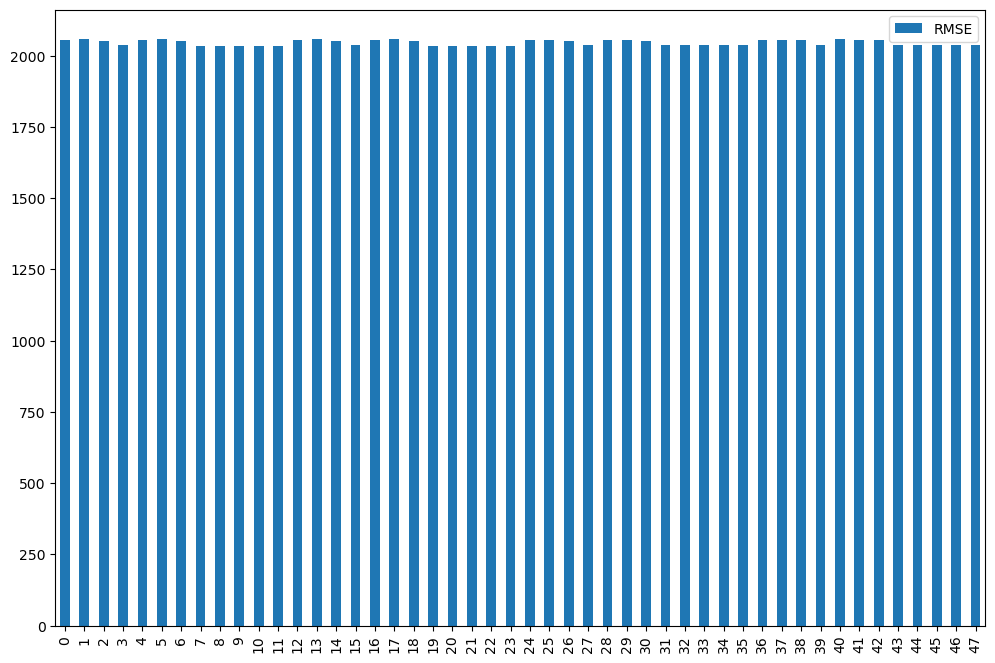

In [65]:
pred_df.plot(kind='bar', figsize=(12,8))

In [64]:
## As It showing me the huge  error

In [66]:
# change the problem a bit
train_df["prep_time"] = train_df["actual_total_delivery_duration"] - train_df["estimated_store_to_consumer_driving_duration"] - train_df["estimated_order_place_duration"]

# not scaling affects the performance, so continue to scale but it doesn't matter much which scaler we used
scalers = {
    "Standard scaler": StandardScaler(),
}

feature_sets = {
    "selected_features_40": importances.sort_values(by='Gini-importance')[-40:].index.tolist(),
}

for feature_set_name in feature_sets.keys():
    feature_set = feature_sets[feature_set_name]
    for scaler_name in scalers.keys():
        print(f"-----scaled with {scaler_name}-------- included columns are {feature_set_name}")
        print("")
        for model_name in regression_models.keys():  
            #drop estimated_store_to_consumer_driving_duration and estimated_order_place_duration
            X = train_df[feature_set].drop(columns=["estimated_store_to_consumer_driving_duration", 
                                           "estimated_order_place_duration"])
            y = train_df["prep_time"]
            
            # to get indices
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
            train_indices = X_train.index
            test_indices  = X_test.index
            
            # scale
            X_scaled, y_scaled, X_scaler, y_scaler = scale(scalers[scaler_name], X, y)
            
            # apply indexing
            X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)
            _, y_predict_scaled, _, _ = make_regression(X_train_scaled, y_train_scaled[:,0], X_test_scaled, y_test_scaled[:,0], regression_models[model_name], model_name, verbose=False)
            rmse_error, y_predict = rmse_with_inv_transform(y_scaler, y_test, y_predict_scaled, model_name)
            pred_dict["regression_model"].append(model_name)
            pred_dict["feature_set"].append(feature_set_name)
            pred_dict["scaler_name"].append(scaler_name)
            pred_dict["RMSE"].append(rmse_error)

-----scaled with Standard scaler-------- included columns are selected_features_40

Error = 2055.703125 in Ridge
Error = 2055.2006484115 in DecisionTree
Error = 2054.8653648188565 in RandomForest
Error = 2035.9288330078125 in XGBoost


In [67]:
# choose best perform model and extract the predictions for preparation duration
pred_values_dict = {
    "actual_total_delivery_duration": train_df["actual_total_delivery_duration"][test_indices].values.tolist(), 
    "prep_duration_prediction":y_predict[:,0].tolist(),
    "estimated_store_to_consumer_driving_duration": train_df["estimated_store_to_consumer_driving_duration"][test_indices].values.tolist(),
    "estimated_order_place_duration": train_df["estimated_order_place_duration"][test_indices].values.tolist(),             
}

In [68]:
# convert it to dataframe from dict
values_df = pd.DataFrame.from_dict(pred_values_dict)
values_df

,actual_total_delivery_duration,prep_duration_prediction,estimated_store_to_consumer_driving_duration,estimated_order_place_duration
0,2448.0,1843.558960,380.0,251.0
1,1839.0,1323.258545,747.0,446.0
2,1927.0,1979.379517,543.0,251.0
3,2657.0,1329.352417,445.0,251.0
4,3596.0,2037.175171,691.0,446.0
...,...,...,...,...
35409,9557.0,2636.044189,768.0,446.0
35410,1864.0,2233.327148,324.0,446.0
35411,2674.0,2119.659424,791.0,251.0
35412,2234.0,1892.820923,687.0,251.0


In [69]:
# sum predictions up with non preparation activities such as order placing and driving.
values_df["sum_total_delivery_duration"] = values_df["prep_duration_prediction"] + values_df["estimated_store_to_consumer_driving_duration"] + values_df["estimated_order_place_duration"]
values_df

,actual_total_delivery_duration,prep_duration_prediction,estimated_store_to_consumer_driving_duration,estimated_order_place_duration,sum_total_delivery_duration
0,2448.0,1843.558960,380.0,251.0,2474.558960
1,1839.0,1323.258545,747.0,446.0,2516.258545
2,1927.0,1979.379517,543.0,251.0,2773.379517
3,2657.0,1329.352417,445.0,251.0,2025.352417
4,3596.0,2037.175171,691.0,446.0,3174.175171
...,...,...,...,...,...
35409,9557.0,2636.044189,768.0,446.0,3850.044189
35410,1864.0,2233.327148,324.0,446.0,3003.327148
35411,2674.0,2119.659424,791.0,251.0,3161.659424
35412,2234.0,1892.820923,687.0,251.0,2830.820923


In [71]:
# check new error rate
mean_squared_error(values_df["actual_total_delivery_duration"], values_df["sum_total_delivery_duration"], squared=False)

2035.928987702173

In [72]:
X = values_df[["prep_duration_prediction", "estimated_store_to_consumer_driving_duration", "estimated_order_place_duration"]]
y = values_df["actual_total_delivery_duration"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [73]:
regression_models = {
    "LinearReg" : linear_model.LinearRegression(),
    "Ridge" : linear_model.Ridge(),
    "DecisionTree" : tree.DecisionTreeRegressor(max_depth=6),
    "RandomForest" : RandomForestRegressor(),
    "XGBoost": XGBRegressor(),
}
for model_name in regression_models.keys():
    _, y_predict, _, _= make_regression(
        X_train, y_train, X_test, y_test,regression_models[model_name], model_name, verbose=False)
    print("RMSE of:",model_name, mean_squared_error(y_test,y_predict, squared=False))

RMSE of: LinearReg 980.3078254643133
RMSE of: Ridge 980.3078254670947
RMSE of: DecisionTree 992.7222664409386
RMSE of: RandomForest 1850.36257442463
RMSE of: XGBoost 2565.6840018692965
